In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for modeling
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
new_spotify_data = pd.read_csv('/Users/yinmialas/Desktop/dspt7_u4_spotify_proyect/archive/data.csv')
print(new_spotify_data.shape)
new_spotify_data.head()

(170653, 19)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# scale features for clustering

In [3]:
train, test = train_test_split(new_spotify_data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=48)

In [4]:
scaleCols4 = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'year', 'popularity', 'duration_ms', 'explicit']

scaler = StandardScaler()
train_scaled_new = scaler.fit_transform(new_spotify_data[scaleCols4])

In [5]:
train_scaled_new

array([[ 1.27618658, -1.46701268, -1.01398836, ..., -1.25680847,
         4.76314621, -0.30395549],
       [ 0.61134711,  1.59877887, -0.5282702 , ..., -1.21099271,
        -0.399747  , -0.30395549],
       [ 1.22034007, -1.18882049, -1.18212158, ..., -1.21099271,
         2.13382382, -0.30395549],
       ...,
       [-1.06670771,  0.5484614 ,  1.40339359, ...,  2.04192615,
        -0.1559516 , -0.30395549],
       [-1.30876246,  0.75852489,  0.52536459, ...,  1.7670316 ,
         0.84205785,  3.2899554 ],
       [-0.98426761,  1.80884237,  0.89152137, ...,  1.95029463,
        -0.32859144,  3.2899554 ]])

In [6]:
train_scaled_df3 = pd.DataFrame(train_scaled_new, columns=scaleCols4)
print(train_scaled_df3.shape)
train_scaled_df3.head()

(170653, 15)


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode,year,popularity,duration_ms,explicit
0,1.276187,-1.467013,-1.013988,2.268102,1.365588,2.626719,-1.514237,-0.379706,-1.169307,-1.782825,0.643912,-2.15247,-1.256808,4.763146,-0.303955
1,0.611347,1.598779,-0.528270,-0.532771,0.512123,-0.262229,-0.170766,1.945481,-1.821180,1.650688,0.643912,-2.15247,-1.210993,-0.399747,-0.303955
2,1.220340,-1.188820,-1.182122,2.379754,-0.625830,-0.599749,-0.593551,-0.396297,-0.212404,-1.858821,0.643912,-2.15247,-1.210993,2.133824,-0.303955
3,1.236296,-1.489722,-0.647832,-0.532682,-0.056853,1.002043,0.377680,-0.387080,-0.545537,-1.381564,0.643912,-2.15247,-1.302624,-0.166101,-0.303955
4,1.209703,-0.677855,-1.081242,-0.532765,-0.625830,0.132499,0.240788,-0.371104,-0.494867,-1.047180,0.643912,-2.15247,-1.348440,-0.509485,-0.303955


In [7]:
train_scaled_df3['index'] = np.arange(1, len(train_scaled_df3)+1)
new_spotify_data['index'] = np.arange(1, len(new_spotify_data)+1)

In [8]:
train_id = new_spotify_data[['index','artists','name','id', 'release_date']]

train_id

,index,artists,name,id,release_date
0,1,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4BJqT0PrAfrxzMOxytFOIz,1921
1,2,['Dennis Day'],Clancy Lowered the Boom,7xPhfUan2yNtyFG0cUWkt8,1921
2,3,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,1o6I8BglA6ylDMrIELygv1,1921
3,4,['Frank Parker'],Danny Boy,3ftBPsC5vPBKxYSee08FDH,1921
4,5,['Phil Regan'],When Irish Eyes Are Smiling,4d6HGyGT8e121BsdKmw9v6,1921
...,...,...,...,...,...
170648,170649,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,0KkIkfsLEJbrcIhYsCL7L5,2020-05-29
170649,170650,['Ashnikko'],Halloweenie III: Seven Days,0OStKKAuXlxA0fMH54Qs6E,2020-10-23
170650,170651,['MAMAMOO'],AYA,4BZXVFYCb76Q0Klojq4piV,2020-11-03
170651,170652,['Eminem'],Darkness,5SiZJoLXp3WOl3J4C8IK0d,2020-01-17


In [11]:
train_new_model = pd.merge(train_scaled_df3, train_id, how='left', on='index')
train_new_model

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode,year,popularity,duration_ms,explicit,index,artists,name,id,release_date
0,1.276187,-1.467013,-1.013988,2.268102,1.365588,2.626719,-1.514237,-0.379706,-1.169307,-1.782825,0.643912,-2.152470,-1.256808,4.763146,-0.303955,1,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4BJqT0PrAfrxzMOxytFOIz,1921
1,0.611347,1.598779,-0.528270,-0.532771,0.512123,-0.262229,-0.170766,1.945481,-1.821180,1.650688,0.643912,-2.152470,-1.210993,-0.399747,-0.303955,2,['Dennis Day'],Clancy Lowered the Boom,7xPhfUan2yNtyFG0cUWkt8,1921
2,1.220340,-1.188820,-1.182122,2.379754,-0.625830,-0.599749,-0.593551,-0.396297,-0.212404,-1.858821,0.643912,-2.152470,-1.210993,2.133824,-0.303955,3,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,1o6I8BglA6ylDMrIELygv1,1921
3,1.236296,-1.489722,-0.647832,-0.532682,-0.056853,1.002043,0.377680,-0.387080,-0.545537,-1.381564,0.643912,-2.152470,-1.302624,-0.166101,-0.303955,4,['Frank Parker'],Danny Boy,3ftBPsC5vPBKxYSee08FDH,1921
4,1.209703,-0.677855,-1.081242,-0.532765,-0.625830,0.132499,0.240788,-0.371104,-0.494867,-1.047180,0.643912,-2.152470,-1.348440,-0.509485,-0.303955,5,['Phil Regan'],When Irish Eyes Are Smiling,4d6HGyGT8e121BsdKmw9v6,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,-1.110321,1.411425,1.216579,-0.531849,0.512123,-0.707298,1.362950,-0.063250,-0.385320,0.301754,0.643912,1.667302,1.858663,0.561107,-0.303955,170649,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,0KkIkfsLEJbrcIhYsCL7L5,2020-05-29
170649,-0.787475,1.019685,1.011083,-0.532771,0.512123,-0.599749,0.956136,-0.232846,0.686274,0.780531,0.643912,1.667302,1.675400,-0.636660,-0.303955,170650,['Ashnikko'],Halloweenie III: Seven Days,0OStKKAuXlxA0fMH54Qs6E,2020-10-23
170650,-1.066708,0.548461,1.403394,-0.532743,-0.341342,0.298399,1.621992,-0.107492,-0.819761,0.411949,-1.553007,1.667302,2.041926,-0.155952,-0.303955,170651,['MAMAMOO'],AYA,4BZXVFYCb76Q0Klojq4piV,2020-11-03
170651,-1.308762,0.758525,0.525365,-0.532746,-0.910318,2.500864,0.755887,1.287989,-1.361404,-1.267570,0.643912,1.667302,1.767032,0.842058,3.289955,170652,['Eminem'],Darkness,5SiZJoLXp3WOl3J4C8IK0d,2020-01-17


In [12]:
train_new_model.shape, new_spotify_data.shape

((170653, 20), (170653, 20))

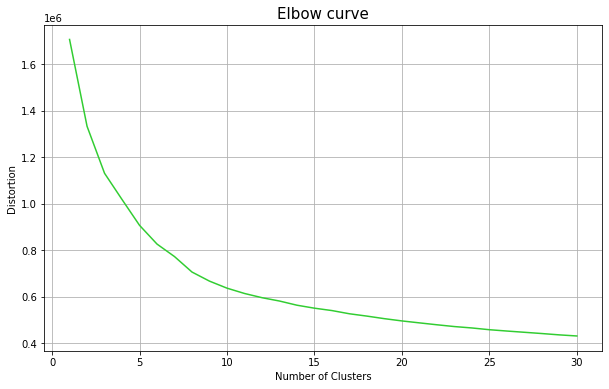

In [13]:
clusCols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'loudness', 'speechiness', 'tempo','valence', 'explicit'] #variables to cluster

distortion = list()
for k in range(1, 31): #started with range [1, 51] and narrowed down to this range 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_new_model.loc[:, clusCols])
    distortion.append(kmeans.inertia_) #append distortion value to list

#plot elbow curves 
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), distortion, c = 'limegreen', label = 'distortion')
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Distortion', fontsize = 10)
plt.grid(True)
plt.title('Elbow curve', fontsize = 15)
plt.show()

In [14]:
nneigh = NearestNeighbors(n_neighbors=15)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'loudness', 'speechiness', 'tempo','valence', 'explicit']

X = train_new_model[features].values

nneigh.fit(X)

NearestNeighbors(n_neighbors=15)

In [15]:
X.shape

(170653, 10)

In [16]:
# test on 1 song
test_song = X[100]

distance, neighbors = nneigh.kneighbors(np.array([test_song]))
distance, neighbors

(array([[0.        , 0.33066472, 0.56461893, 0.58997312, 0.62428065,
         0.62671403, 0.64507556, 0.65671301, 0.6699996 , 0.67464918,
         0.67879247, 0.67928821, 0.68416604, 0.68962238, 0.69178046]]),
 array([[   100, 142463,     66,     26,  42272, 157599,  59317,  80295,
          20285, 142309,  59031,  24813,    404,  41900, 111390]]))

In [17]:
train_new_model.iloc[100]

acousticness                       1.31076
danceability                     -0.660823
energy                           -0.939262
instrumentalness                 -0.532762
key                               -1.47929
liveness                          0.384209
loudness                         -0.706399
speechiness                      -0.280161
tempo                              -1.1102
valence                           0.487945
mode                              0.643912
year                              -2.15247
popularity                        -1.44007
duration_ms                      -0.341072
explicit                         -0.303955
index                                  101
artists                   ['Robert Jysor']
name                              Dolorosa
id                  4Zu1Kr6zfR04pETJbFh7Ox
release_date                          1921
Name: 100, dtype: object

In [18]:
song_list = []
for item in neighbors[0][1:]: # this way excludes itself
    row = train_new_model.iloc[item]
    # print(f'Artist: {row.artist_name} - Track: {row.track_name}')
    song_list.append((row.artists, row.name))
print(song_list)

[("['Arthur Schwartz', 'Johnny Johnston', 'A Tree Grows in Brooklyn Ensemble', 'Jay Blackton']", 142463), ("['André Urban']", 66), ("['Maurice Chevalier']", 26), ("['Sonny Boy Williamson I']", 42272), ("['Fairuz']", 157599), ("['Kostas Roykoynas']", 59317), ("['Sons of the Pioneers']", 80295), ("['Mistinguett']", 20285), ("['Sandhya Mukherjee']", 142309), ("['Suchitra Mitra']", 59031), ("['Dinah Shore', 'Russell Nype']", 24813), ("['Eugénie Buffet', 'René De Buxeuil']", 404), ("['Lead Belly']", 41900), ("['Lata Mangeshkar']", 111390)]


In [19]:
song_list1 = []
for item1 in neighbors[0][1:]: # this way excludes itself
    row1 = new_spotify_data.iloc[item1]
    # print(f'Artist: {row.artist_name} - Track: {row.track_name}')
    song_list1.append((row1.artists, row.name))
print(song_list1)

[("['Arthur Schwartz', 'Johnny Johnston', 'A Tree Grows in Brooklyn Ensemble', 'Jay Blackton']", 111390), ("['André Urban']", 111390), ("['Maurice Chevalier']", 111390), ("['Sonny Boy Williamson I']", 111390), ("['Fairuz']", 111390), ("['Kostas Roykoynas']", 111390), ("['Sons of the Pioneers']", 111390), ("['Mistinguett']", 111390), ("['Sandhya Mukherjee']", 111390), ("['Suchitra Mitra']", 111390), ("['Dinah Shore', 'Russell Nype']", 111390), ("['Eugénie Buffet', 'René De Buxeuil']", 111390), ("['Lead Belly']", 111390), ("['Lata Mangeshkar']", 111390)]


In [39]:
df_new2 = train_new_model['id']
df_new2 = pd.DataFrame(df_new2)
df_new2['song_num']= np.arange(0, len(df_new2))

df_new2

,id,song_num
0,4BJqT0PrAfrxzMOxytFOIz,0
1,7xPhfUan2yNtyFG0cUWkt8,1
2,1o6I8BglA6ylDMrIELygv1,2
3,3ftBPsC5vPBKxYSee08FDH,3
4,4d6HGyGT8e121BsdKmw9v6,4
...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,170648
170649,0OStKKAuXlxA0fMH54Qs6E,170649
170650,4BZXVFYCb76Q0Klojq4piV,170650
170651,5SiZJoLXp3WOl3J4C8IK0d,170651


In [40]:
#train_new_model['song_num']= np.arange(0, len(train_new_model))
song_num = df_new2[df_new2['id']== 'id'].song_num.to_numpy()

In [41]:
#hola = np.array(train_new_model.values[song_num])
#hola.shape

nneigh1 = NearestNeighbors(n_neighbors=15)

nneigh1.fit(train_scaled_df3.values)

distance, neighbors = nneigh1.kneighbors(np.array(train_scaled_df3.values[song_num]))

ValueError: Found array with 0 sample(s) (shape=(0, 16)) while a minimum of 1 is required.